# Load and cleaning

### Libraries and code load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import sklearn
from sklearn.svm import SVR

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv('housing.csv')

# Data Exploration
print(df.describe())
print(df.info())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------

### Replace no, yes

In [3]:
df=df.replace(to_replace=['no', 'yes'], value=[0, 1])

C:\Users\Nik\AppData\Local\Temp\ipykernel_13772\3221324630.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(to_replace=['no', 'yes'], value=[0, 1])


### Get dummies

In [4]:
df=pd.get_dummies(df).astype(int)

In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


# EDA

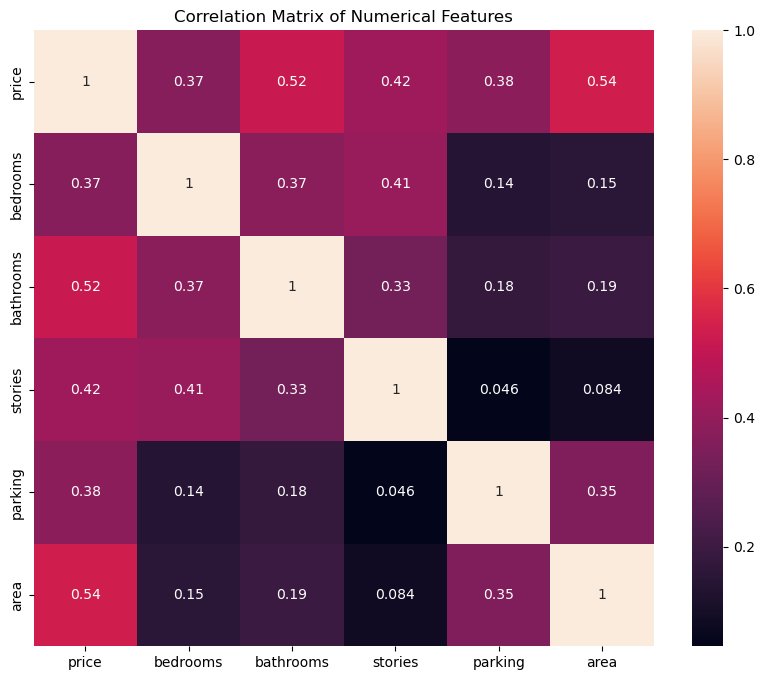

In [6]:
# Correlation matrix for numerical features
# Define numerical features
numerical_features = ['price', 'bedrooms', 'bathrooms', 'stories', 'parking', 'area']
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

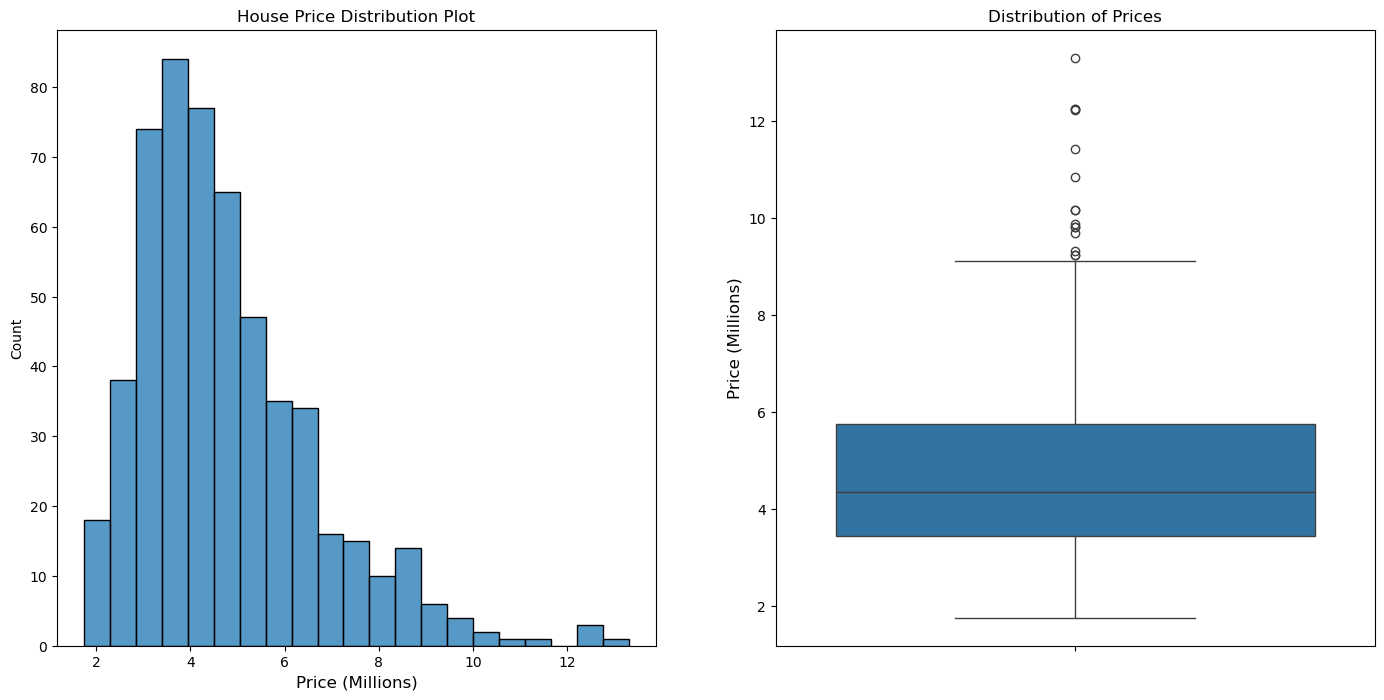

In [7]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.histplot(df['price'] / 1_000_000 )
plt.xlabel('Price (Millions)', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(df['price'] / 1_000_000)
plt.title('Distribution of Prices')
plt.ylabel('Price (Millions)', fontsize=12)

plt.show()

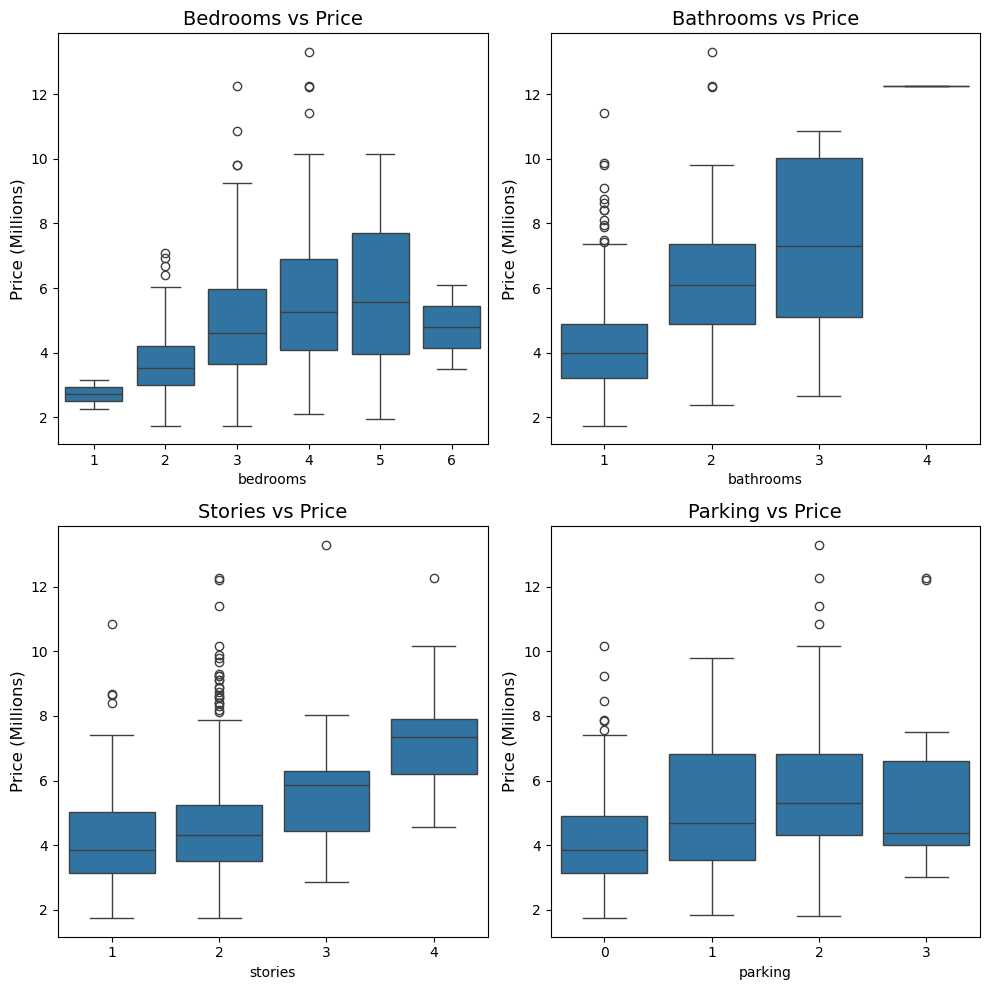

In [8]:
# Visualize relationships between key features and price
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=df, x='bedrooms', y=df['price'] / 1_000_000, ax=axes[0, 0])
axes[0, 0].set_ylabel('Price (Millions)', fontsize=12)

sns.boxplot(data=df, x='bathrooms', y=df['price'] / 1_000_000, ax=axes[0, 1])
axes[0, 1].set_ylabel('Price (Millions)', fontsize=12)

sns.boxplot(data=df, x='stories', y=df['price'] / 1_000_000, ax=axes[1, 0])
axes[1, 0].set_ylabel('Price (Millions)', fontsize=12)

sns.boxplot(data=df, x='parking', y=df['price'] / 1_000_000, ax=axes[1, 1])
axes[1, 1].set_ylabel('Price (Millions)', fontsize=12)

# Add titles to each subplot
axes[0, 0].set_title('Bedrooms vs Price', fontsize=14)
axes[0, 1].set_title('Bathrooms vs Price', fontsize=14)
axes[1, 0].set_title('Stories vs Price', fontsize=14)
axes[1, 1].set_title('Parking vs Price', fontsize=14)

plt.tight_layout()
plt.show()

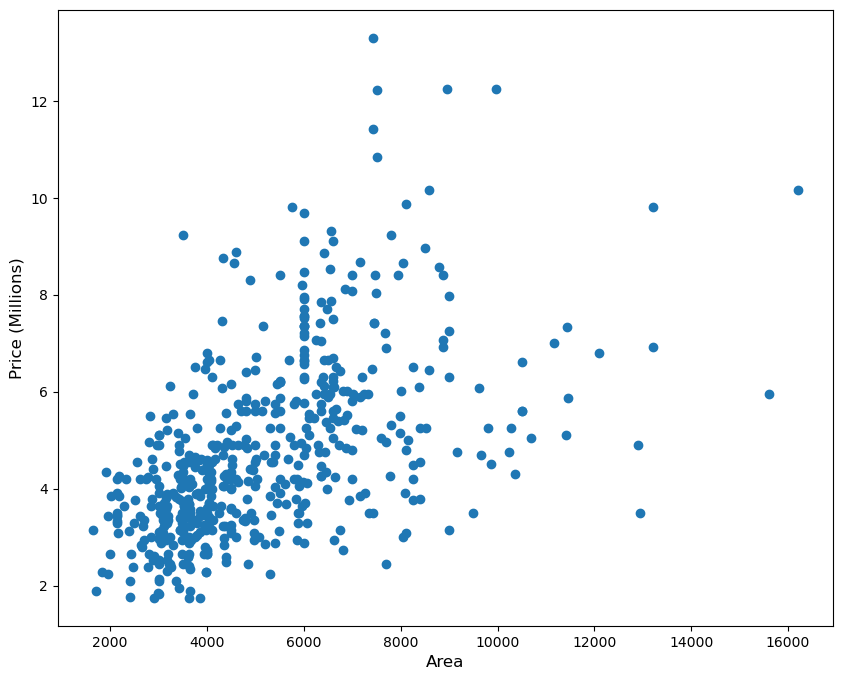

In [9]:
#scatter plot area/price
plt.figure(figsize=(10, 8))
plt.ylabel('Price (Millions)', fontsize=12)
plt.xlabel('Area', fontsize=12)

plt.scatter(df['area'],df['price'] / 1_000_000)
plt.show()

# Modeling

### Removing outliers (TRIAL)

In [10]:
#threshold_2 = 9000000
#df = df[df['price'] <= threshold_2] 
#sns.boxplot(df['price'])

### Dropping columns (TRIAL)

In [11]:
# Prepare features and target
#X = df.drop(['price'], axis=1)

# Apply log transformation
#df['area'] = np.log(df['area'])

#X = df.drop(['price', 'hotwaterheating', 'furnishingstatus_semi-furnished', ], axis=1)

### Split the data

In [12]:
X = df.drop(['price'], axis=1)

y = df['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Try different scalers

In [14]:
# scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler = RobustScaler(unit_variance=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Define cross-validation method

In [15]:

k = 15  # Number of folds
cv = KFold(n_splits=k, random_state=42, shuffle=True)

### Define model

Compare
 - Random Forest Regressor
 - GBR
 - Ridge
 - Lasso

In [16]:
model = [RandomForestRegressor(n_estimators=150, max_depth=10), 
         GradientBoostingRegressor(random_state=42), 
         Ridge(alpha=10, random_state=42), 
         Lasso(alpha=1.5)]

### Perform k-fold cross-validation - calculate R2 and its standard deviation

In [17]:
# scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

for md in model:
    scores = cross_val_score(md, X, y, cv=cv, scoring='r2')
    for fold, R2 in enumerate(scores, 1):
        print(f"Fold {fold} R2: {R2:.4f}")
    
    # Calculate and print the average R2 and its standard deviation
    print(f"\nAverage R2 for {md}']: {np.mean(scores):.4f} (+/- {np.std(scores) * 2:.4f})")

    print("\n")

Fold 1 R2: 0.6198
Fold 2 R2: 0.6688
Fold 3 R2: 0.4923
Fold 4 R2: 0.3984
Fold 5 R2: 0.5900
Fold 6 R2: 0.7146
Fold 7 R2: 0.3051
Fold 8 R2: 0.5029
Fold 9 R2: 0.5039
Fold 10 R2: 0.6332
Fold 11 R2: 0.8090
Fold 12 R2: 0.5125
Fold 13 R2: 0.5431
Fold 14 R2: 0.6545
Fold 15 R2: 0.5663

Average R2 for RandomForestRegressor(max_depth=10, n_estimators=150)']: 0.5676 (+/- 0.2424)


Fold 1 R2: 0.6013
Fold 2 R2: 0.7055
Fold 3 R2: 0.5637
Fold 4 R2: 0.4566
Fold 5 R2: 0.6313
Fold 6 R2: 0.6574
Fold 7 R2: 0.4088
Fold 8 R2: 0.5569
Fold 9 R2: 0.4394
Fold 10 R2: 0.5817
Fold 11 R2: 0.8224
Fold 12 R2: 0.5025
Fold 13 R2: 0.5218
Fold 14 R2: 0.6127
Fold 15 R2: 0.5461

Average R2 for GradientBoostingRegressor(random_state=42)']: 0.5739 (+/- 0.2064)


Fold 1 R2: 0.6874
Fold 2 R2: 0.6851
Fold 3 R2: 0.5206
Fold 4 R2: 0.5714
Fold 5 R2: 0.5889
Fold 6 R2: 0.6963
Fold 7 R2: 0.4384
Fold 8 R2: 0.6119
Fold 9 R2: 0.3822
Fold 10 R2: 0.5401
Fold 11 R2: 0.8382
Fold 12 R2: 0.5484
Fold 13 R2: 0.5343
Fold 14 R2: 0.7773
Fold 15 R2: 

### Make predictions and evaluate in test set

In [24]:
for md in model:
    md.fit(X_train_scaled, y_train)
    y_pred = md.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(md)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared Score: {r2:.2f}')

RandomForestRegressor(max_depth=10, n_estimators=150)
Mean Squared Error: 1905120199452.59
R-squared Score: 0.62
GradientBoostingRegressor(random_state=42)
Mean Squared Error: 1685770579802.71
R-squared Score: 0.67
Ridge(alpha=10, random_state=42)
Mean Squared Error: 1770283513263.71
R-squared Score: 0.65
Lasso(alpha=1.5)
Mean Squared Error: 1754323271847.59
R-squared Score: 0.65


### Experiment with Variance Inflation Factor to deal with Multicollinearity 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'X' is your feature matrix
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            feature        VIF
0                              area   1.325250
1                          bedrooms   1.369477
2                         bathrooms   1.286621
3                           stories   1.478055
4                          mainroad   1.172728
5                         guestroom   1.212838
6                          basement   1.323050
7                   hotwaterheating   1.041506
8                   airconditioning   1.211840
9                           parking   1.212837
10                         prefarea   1.149196
11       furnishingstatus_furnished   8.575840
12  furnishingstatus_semi-furnished  12.404306
13     furnishingstatus_unfurnished   8.826219
